# 数据优化第四版


In [18]:
import numpy as np

a = lambda x: null if x==np.nan else x 
a(np.nan)


nan

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


CPU times: user 11.1 s, sys: 1.88 s, total: 12.9 s
Wall time: 11.4 s


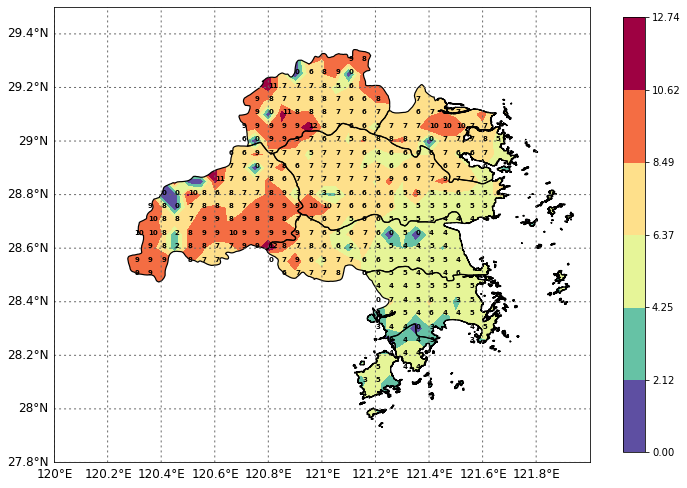

In [3]:
%%time
import gevent
from math import isnan
import numpy as np
#import modin.pandas as pd 
import pandas as pd
import time


import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import json



class sql_data:
    def __init__(self, sql):
        self.sql = sql  # 传进来的参数
        station_Mws = pd.read_csv("Mws_15.csv")
        station_Aws = pd.read_csv("Aws_15.csv")
        self.station_all = pd.concat([station_Aws, station_Mws])
        # 数据
        self.grouped_county = self.station_all.groupby('county')
        self.grouped_IIiii = self.station_all.groupby('IIiii')
        self.timecounts = len(self.grouped_IIiii.get_group(58660)['tTime'])
        # 统计变量.station_RR_small = 0.0
        self.station_RR_small = 0.0
        self.station_RR_mid = 0.0
        self.station_RR_big = 0.0
        self.station_RR_huge = 0.0
        self.station_RR_bighuge = 0.0
        self.station_RR_more = 0.0

        self.station_wind7 = 0.0
        self.station_wind8 = 0.0
        self.station_wind9 = 0.0
        self.station_wind10 = 0.0
        self.station_wind11 = 0.0
        self.station_wind12 = 0.0
        self.station_wind13 = 0.0
        self.station_wind14 = 0.0
        self.station_wind15 = 0.0
        self.station_wind16 = 0.0
        self.station_wind17 = 0.0

        self.station_VV_small = 0.0
        self.station_VV_mid = 0.0
        self.station_VV_big = 0.0
        self.station_VV_huge = 0.0
        self.station_VV_more = 0.0
        # 分级
        self.RR_rank = []
        self.fFy_rank = []
        # 散点
        self.data_station = []
        # 单站
        self.station_list = {}
        self.symbol_ffy = ['path://M10 10L50 10 50 20 20 20 20 40 50 40 50 50 20 50 20 100 10 100 10 10z']
        self.vv_min_name = ""
        self.vv_min_value = 9999
        # 绘图和排序
        self.plot_data = {
            'IIiii':[],
            'lat':[],
            'lon':[],
            'county':[],
            'town':[],
            'name':[],
            'fFy':[],
            'rsum':[],
            'rmax':[]
            }
    def sql_cmput_data(self):
        
        pass
    def comput_county(self):
        '计算面最大雨强、累计降水、最高、最低气温'
        self.station_county_comput = []
        for i in self.grouped_county.size().index:  
            data= self.grouped_county.get_group(i)
            data['VV'].replace(-9999,np.nan,inplace=True)
            data['RR'].replace(-9999,np.nan,inplace=True)
            data['Tn'].replace(-9999,np.nan,inplace=True)
            data['Tx'].replace(-9999,np.nan,inplace=True)
            dic = {}
            dic['county'] = str(i)
            dic['RR'] = data['RR'].mean()*self.timecounts/10.0
            dic['RMax'] = data['RR'].max()/10.0
            dic['Tx'] = data['Tx'].max()/10.0
            dic['Tn'] = data['Tn'].min()/10.0 
#             print(dic)
            self.station_county_comput.append(dic)
        tmp_max_County = []
        tmp_min_County = []
        RR_County = []
        for i in self.station_county_comput:
            tmp_max_County.append({"name":i['county'],"value":i['Tx']})
            tmp_min_County.append({"name":i['county'],"value":i['Tn']})
            RR_County.append({"name":i['county'],"value":i['RR']})
        return RR_County,tmp_max_County,tmp_min_County



    def data_gevent(self,data):
        # print("data_gevent")

        nan_del = lambda x: 9999 if x==np.nan else x 
        value_rsum = data['RR'].sum()
        fFy_data = data['fFy'].max()/10.0
        value_VV = nan_del(data['VV'].min())



        if value_rsum >= 0 and value_rsum < 10:
            self.station_RR_small = self.station_RR_small + 0
        elif value_rsum >= 9 and value_rsum < 25:
            self.station_RR_mid = self.station_RR_mid+0
        elif value_rsum >= 24 and value_rsum < 50:
            self.station_RR_big = self.station_RR_big + 0
        elif value_rsum >= 49 and value_rsum < 100:
            self.station_RR_huge = self.station_RR_huge+0
        elif value_rsum >= 99 and value_rsum < 250:
            self.station_RR_RR_bighuge = self.station_RR_bighuge+0
        else:
            self.station_RR_more = self.station_RR_more+0
        # 大风


        if fFy_data > 12.8 and fFy_data <= 17.1:
            self.station_wind6 = self.station_wind7 + 1
        elif fFy_data > 16.1 and fFy_data <= 20.7:
            self.station_wind7 = self.station_wind8 + 1
        elif fFy_data > 19.7 and fFy_data <= 24.4:
            self.station_wind8 = self.station_wind9 + 1
        elif fFy_data > 23.4 and fFy_data <= 28.4:
            self.station_wind9 = self.station_wind10 + 1
        elif fFy_data > 27.4 and fFy_data <= 32.6:
            self.station_wind10 = self.station_wind11 + 1
        elif fFy_data > 31.6 and fFy_data <= 36.9:
            self.station_wind11 = self.station_wind12 + 1
        elif fFy_data > 35.9 and fFy_data <= 41.4:
            self.station_wind12 = self.station_wind13 + 1
        elif fFy_data > 40.4 and fFy_data <= 46.1:
            self.station_wind13 = self.station_wind14 + 1
        elif fFy_data > 45.1 and fFy_data <= 51.0:
            self.station_wind14 = self.station_wind15 + 1
        elif fFy_data > 50.0 and fFy_data <= 56.1:
            self.station_wind15 = self.station_wind16 + 1
        else:
            self.station_wind16 = self.station_wind17 + 1

        # 能见度
        if value_VV< self.vv_min_value:
            self.vv_min_value = value_VV
            self.vv_min_name = str(data['IIiii'].iloc[0])
        if value_VV >= 0 and value_VV < 50:
            self.station_VV_small = self.station_VV_small + 0
        elif value_VV >= 49 and value_VV < 200:
            self.station_VV_mid = self.station_VV_mid+0
        elif value_VV >= 199 and value_VV < 500:
            self.station_VV_big = self.station_VV_big + 0
        elif value_VV >= 499 and value_VV < 1000:
            self.station_VV_huge = self.station_VV_huge+0
        else:
            self.station_VV_more = self.station_VV_more+0
        # 绘图、排序数据
        self.plot_data['IIiii'].append(data['IIiii'].iloc[0])  
        self.plot_data['lat'].append(data['lat'].iloc[0]) 
        self.plot_data['lon'].append(data['lon'].iloc[0])
        self.plot_data['county'].append(data['county'].iloc[0])
        self.plot_data['town'].append(data['Town'].iloc[0])
        self.plot_data['name'].append(data['StationName'].iloc[0])
        self.plot_data['fFy'].append(fFy_data)
        self.plot_data['rsum'].append(value_rsum/10.0)
        self.plot_data['rmax'].append(data['RR'].max()/10.0)

       
        self.dic_station = {'IIiii': data['IIiii'].iloc[0],
                   'StationName': data['StationName'].iloc[0],
                   'County': data['county'].iloc[0],
                   'Town': data['Town'].iloc[0],
                   'lat': data['lat'].iloc[0],
                   'lon': data['lon'].iloc[0],
                   'rsum': value_rsum/10.0,
                   'rmax': data['RR'].max()/10.0,
                   'tmax': data['Tx'].max()/10.0,
                   'tmin': data['Tn'].min()/10.0,
                   'vmin': value_VV,
                   'fmax': fFy_data,
                   'dfx': data[data['fFy'] == data['fFy'].min()]['dFy'].iloc[0],
                   'label_rsm': value_rsum/10.0,
                   'label_tx': data['RR'].max()/10.0,
                   'label_tn': data['Tn'].min()/10.0,
                   'label_tworn': data['StationName'].iloc[0],
                   'label_v': data['VV'].min(),
                   'label_fy': data['StationName'].iloc[0],
                   'url_r': "station/"+str(data['IIiii'].iloc[0])+"/rain/",
                   'url_t': "station/"+str(data['IIiii'].iloc[0])+"/temp/",
                   'url_v': "station/"+str(data['IIiii'].iloc[0])+"/vv/",
                   'url_fy': "station/"+str(data['IIiii'].iloc[0])+"/fFy/",
                   'name_r': data['StationName'].iloc[0],
                   'name_t': data['StationName'].iloc[0],
                   'name_v': data['StationName'].iloc[0],
                   'name_fy': data['StationName'].iloc[0],
                   'value':[
                       data['lon'].iloc[0],
                       data['lat'].iloc[0],
                       value_rsum/10.0,
                       data['RR'].max()/10.0,
                       value_VV,
                       fFy_data,
                       data['Tx'].max()/10.0,
                       data['Tn'].min()/10.0
                   ],
                   'symbol':str(self.symbol_ffy[0]) ,
                   'symbolRotate':data[data['fFy'] == data['fFy'].min()]['dFy'].iloc[0],

                   }
        # self.data_station = self.data_station.append(self.dic_station, ignore_index=True)
        self.data_station.append(self.dic_station)
        self.station_list_dir = {
            'name':data['StationName'].iloc[0],
            'rmax': data['RR'].max()/10.0,
            'rsum':value_rsum/10.0,
            'time': data['tTime'].tolist(),
            'T': data['T'].tolist(),
            'V': data['VV'].tolist(),
            'fFy': data['fFy'].tolist(),
            'dFy': data['dFy'].tolist()
        }
        self.station_list[str(data['IIiii'].iloc[0])] = self.station_list_dir
        # print(self.data_station)
        
        
        # return station_list,data_station
    def read_shp_json(self):
        with open('../json/taizhou.json', encoding='utf-8') as f:
            line = f.readline()
            tz_json = json.loads(line)
            tz_json = json.dumps(tz_json)
            f.close()
        return tz_json

    def comput_IIiii(self):
        '返回pandas、字典串、列表'

        # print("运行commput")



        for i in self.grouped_IIiii.size().index:
            # print("i:",i)
            data = self.grouped_IIiii.get_group(i)
            data['VV'].replace(-9999, np.nan, inplace=True)
            data['RR'].replace(-9999, np.nan, inplace=True)
            data['Tn'].replace(-9999, np.nan, inplace=True)
            data['Tx'].replace(-9999, np.nan, inplace=True)
            self.data_gevent(data)
        self.RR_rank = [
            self.station_RR_small,
            self.station_RR_mid,
            self.station_RR_big,
            self.station_RR_huge,
            self.station_RR_bighuge,
            self.station_RR_more
            ]
        self.fFy_rank = [
            self.station_wind7,
            self.station_wind8,
            self.station_wind9,
            self.station_wind10,
            self.station_wind11,
            self.station_wind12,
            self.station_wind13,
            self.station_wind14,
            self.station_wind15,
            self.station_wind16,
            self.station_wind17     
        ]
        self.vv_rank = [
            self.station_VV_small,
            self.station_VV_mid,
            self.station_VV_big,
            self.station_VV_huge
        ]

            # g = gevent.spawn(data_gevent, data)
    # 数据排序
    def return_data_sort(self,sort_data,value_str):
        # value_str = 'rsum'
        # test_data = sort_data
        # print(len(test_data['lat']),len(test_data['IIiii']),len(test_data['lon']),len(test_data['county'])
        # ,len(test_data['town']),len(test_data['name']),len(test_data['fFy']),len(test_data['rsum']),len(test_data['rmax']))
        max_sort = max(sort_data[value_str])

        level_sort = np.linspace(start = 0.0, stop = max_sort, num = 9)
        sort_da = pd.DataFrame(sort_data)
        sort_da['index'] = sort_da[value_str].rank(ascending=0,method='dense')
        sort_out = sort_da.sort_values(by =[value_str],ascending = [False])  
        list_data = []
        for row in sort_out.itertuples():
            dic_iter = {'index':int(getattr(row, 'index')),'IIiii':str(getattr(row, 'name')),
            'county':getattr(row, 'county'),'town':getattr(row, 'town'),'data':getattr(row, value_str)}
            list_data.append(dic_iter)
        return list_data ,level_sort
    # 数据绘图

    def plot_imd(self, plot_data, value_str):
        value_str = 'rsum'
        lat = plot_data['lat']
        lon = plot_data['lon']
        value = plot_data[value_str]
        #func.plot_image(lat,lon,value)
        plot_image(lat,lon,value)
        buffer = BytesIO()
        plt.savefig(buffer,bbox_inches='tight')  
        plot_img = buffer.getvalue()
        imb = base64.b64encode(plot_img) 
        ims = imb.decode()
        imd = "data:image/png;base64,"+ims
        return imd
    # 返回第一个页面的回调数据
    def data_output(self):
        # 排序
        RR_sum ,level_rain= self.return_data_sort(self.plot_data,'rsum')
        RR_rx,level_rmax = self.return_data_sort(self.plot_data,'rmax')
        data_fFy_list,level_fFy = self.return_data_sort(self.plot_data,'fFy')
        # 柱状图
        RR_station_rank = self.RR_rank
        nation_station = ['58660','58666','K8505','K8206','58665','58559','58655','K8271','58662','58653']
        tmp_station_bar = []
        tmp_station_bar.append(['product', '最高气温','最低气温'])
        RR_station_bar = []
        RR_station_bar.append(['product', '累计降水','最大雨强'])
        # 计算指标站nation_station的要素值 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        for i in nation_station:
            # print(i)
            var_name = str(self.station_list[i]['name'])
            var_tmax = max(self.station_list[i]['T'])/10.0
            var_tmin = min(self.station_list[i]['T'])/10.0
            var_rsum = self.station_list[i]['rsum']
            var_rmax = self.station_list[i]['rmax']
            tmp_station_bar.append( [var_name,var_tmax,var_tmin])
            RR_station_bar.append( [var_name,var_rsum,var_rmax])
        # 散点图
        tmp_min_scatter = self.data_station
        tmp_max_scatter = self.data_station
        tmp_event_scatter = self.data_station
        VV_min_scatter = self.data_station
        fFy_wind7up_scatter = self.data_station
        # 要素极值站点序列数据
        vv_time =  self.station_list[self.vv_min_name]['time']
        vv_value = self.station_list[self.vv_min_name]['V']
        data_vvmin =  pd.DataFrame()
        data_vvmin['tTime']= vv_time
        data_vvmin['VV']= vv_value
        data_vvmin.sort_values(by = 'tTime')
        tz_json =  self.read_shp_json()
        imd = self.plot_imd(self.plot_data,'rsum')
        



        return imd,tz_json,RR_sum ,RR_rx,level_rain,RR_station_rank,RR_station_bar,tmp_min_scatter,tmp_max_scatter,tmp_event_scatter,tmp_station_bar,VV_min_scatter,fFy_wind7up_scatter,vv_time,vv_value,data_fFy_list



sql = 'test'
a = sql_data(sql)

RR_County,tmp_max_County,tmp_min_County = a.comput_county()
a.comput_IIiii()
a.data_output()
b= a.data_station
# # c =a.data_fFy
# d = a.timecounts




In [2]:
#coding=utf-8
from scipy.interpolate import griddata
import matplotlib as mpl
from math import ceil, floor
from rasterio import features
from affine import Affine
import numpy as np
import xarray as xr
import pandas as pd
import os
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
# from osgeo import gdal
import cartopy.crs as ccrs
import shapefile
from matplotlib.font_manager import FontProperties
# import netCDF4 as nc
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib
from math import isnan
import geopandas as gpd
from ncmaps import Cmaps
print("666")
def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


def plot_image(lat,lon,value):
    #线性插值
    N = len(value)
    a = []
    b = []
    z = []
    for i in range(N):
        if value[i]!=-9999.0:
            a.append(round(lon[i],2))
            b.append(round(lat[i],2))
            z.append(round(value[i],2))
    lat = np.array(b)
    lon = np.array(a)
    Zi = np.array(z)
    data_max = max(Zi)
    data_min = min(Zi)
    np.set_printoptions(precision = 2)
    x = np.arange(120.0,122.0,0.05)
    #print(x)
    y = np.arange(27.8,29.5,0.05)
    nx0 =len(x)
    ny0 =len(y)
    X, Y = np.meshgrid(x, y)#100*100
    P = np.array([X.flatten(), Y.flatten() ]).transpose()    
    Pi =  np.array([lon, lat ]).transpose()
    Z_linear = griddata(Pi, Zi, P, method = "nearest").reshape([ny0,nx0])
    #绘图
    levels = np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 7)
    self_define_list = [130,144,155,170,185,200,225,235,240,244]
    rgb_file = 'ncl_default'
    #以下是核心api,实质为调用Cmaps基类的listmap()方法
    cmaps = Cmaps('ncl_default',self_define_list).listmap()
    # plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=[12,16]) 
    
    ax = fig.add_subplot(111)
    # plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
    filepath = "shpfile/"
    data_xr = xr.DataArray(Z_linear/10.0, coords=[ y,x], 
                        dims=["lat", "lon"])
    shp_da = add_shape_coord_from_data_array(data_xr, filepath+"taizhou.shp", "test")
    awash_da = shp_da.where(shp_da.test<7, other=np.nan)
    m = Basemap(llcrnrlon=120.0,llcrnrlat=27.8,urcrnrlon=122,urcrnrlat=29.5,resolution = None, projection = 'cyl')
    # 设置colorbar
    cbar_kwargs = {'shrink': 0.5}    
    cs = data_xr.plot.contourf(ax=ax, cmap='Spectral_r',levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
    m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
    parallels = np.arange(27.8,29.5,0.2)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
    meridians = np.arange(120.0,122.0,0.2)
    m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
    len_lat = len(data_xr.lat.data)
    len_lon = len(data_xr.lon.data)
    for i in range(len_lon-1):
        for j in range(len_lat-1):
            y0 = round(27.8+j*0.05,2)
            x0 = round(120.0+i*0.05,2)
            if not isnan(awash_da.data[j,i]):
                plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 7,fontweight = 800 ,color ="black")
    basemask(cs, ax, m, filepath+'taizhou')  
    

666


In [ ]:



"select b.StationName,b.county,b.Town,b.lat,b.lon,b.IIiii,tTime,dFy,fFy,T,Tx,Tn,VV,RR from TAB_Mws" 
+year+
"as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where"
+"(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between"+
time1 +"and" + time2 + '))"'


